# DEEP LEARNING

In [1]:
import tensorflow as tf
import subprocess, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import uuid
ide = hex(uuid.getnode())
ide

'0xacd28657d946'

In [7]:
ide = re.findall(r'[A-Z0-9-]+-[A-Z0-9-]+',str(subprocess.check_output('wmic csproduct get uuid').strip()))[0]

local_var = pd.read_csv('path.csv',index_col=0)

if ide in local_var.index:
    username = local_var.loc[ide,'name']
    path_dataset = local_var.loc[ide,'path_dataset']
    path_analysis = local_var.loc[ide,'path_analysis']
    path_data_prep = local_var.loc[ide,'path_data_prep']
    path_models = local_var.loc[ide,'path_models']
    print(f'  Username: {username}\n'
         +f'  Dataset directory: {path_dataset}\n'
         +f'  Saved analysis: {path_analysis}\n'
         +f'  Data preprocessed directory: {path_data_prep}\n'
         +f'  Models directory: {path_models}')
else:
    print('Computer not recognized :\n'
         f'  Please enter your computer_id {ide} and the associated parameters in \path.csv')

  Username: Paul
  Dataset directory: C:/Users/luap_/OneDrive/Data_Science/Projects/bloody_spy_blast/dataset/PBC_dataset_normal_DIB/
  Saved analysis: C:/Users/luap_/OneDrive/Data_Science/Projects/bloody_spy_blast/analysis/
  Data preprocessed directory: C:/Users/luap_/OneDrive/Data_Science/Projects/bloody_spy_blast/data_prep/
  Models directory: C:/Users/luap_/OneDrive/Data_Science/Projects/bloody_spy_blast/models/


In [4]:
# directory = r'C:\Users\luap_\OneDrive\Data_Science\Projects\bloody_spy_blast\dataset\PBC_dataset_normal_DIB'
# directory = path_dataset

img_size = 60
img_height = img_size
img_width = img_size
batch_size = 32

batch_size = 2**5
filter_conv2d = 32

# Entrainement
n_epochs=5

print(batch_size)

32


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                    # shear_range = 0.2, # Shear means that the image will be distorted along an axis
                                    zoom_range = 0.2,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    # horizontal_flip=True,
                                    # vertical_flip=True,
                                    fill_mode='nearest',
                                    validation_split=0.2,
                                    test_split = 0.1) # set validation split

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
                        # train_data_dir,
                        path_dataset,
                        target_size=(img_height, img_width),
                        batch_size=batch_size,
                        # class_mode='binary',
                        class_mode = 'categorical',
                        seed=1234, # pour récupérer la consistence de la séparation des données
                        subset='training') # set as training data

validation_set = train_datagen.flow_from_directory(
                        # train_data_dir, # same directory as training data
                        path_dataset, # same directory as training data
                        target_size=(img_height, img_width),
                        batch_size=batch_size,
                        # class_mode='binary',
                        class_mode = 'categorical',
                        seed=1234, # pour récupérer la consistence de la séparation des données
                        subset='validation') # set as validation data

test_set = train_datagen.flow_from_directory(
                        # train_data_dir, # same directory as training data
                        path_dataset, # same directory as training data
                        target_size=(img_height, img_width),
                        batch_size=batch_size,
                        # class_mode='binary',
                        class_mode = 'categorical',
                        seed=1234, # pour récupérer la consistence de la séparation des données
                        subset='test') # set as validation data


TypeError: __init__() got an unexpected keyword argument 'test_split'

# Affichage de la donnée "Augmentée"

> On observe le résultat de la donnée augmentée

In [ ]:


batches_real = ImageDataGenerator(rescale = 1./255).flow_from_directory(path_dataset, target_size = (360, 360), batch_size = 16, class_mode = 'categorical', seed=1234)
batches_augmented = train_datagen.flow_from_directory(path_dataset, target_size = (360, 360), batch_size = 16, class_mode = 'categorical', seed=1234)

x_batch_augmented, y_batch_augmented = next(batches_augmented)
x_batch_real, y_batch_real = next(batches_real)

def getClass(batches,i):
    class_indices = batches.class_indices
    for c in class_indices:
        if class_indices[c] == i:
            return c

for i in np.random.choice(batches_real.batch_size, size=6):
    
    image_augmented = x_batch_augmented[i]
    image_real = x_batch_real[i]
    
    
    title_add_on = getClass(batches_real,np.argmax(y_batch_augmented[i]))

    plt.subplot(221)
    plt.imshow(image_real)
    plt.title("original img of\n" + title_add_on)
    plt.axis('off')

    plt.subplot(222)
    plt.imshow(image_augmented)
    plt.title("augmented img of\n" + title_add_on)
    plt.axis('off')

    plt.show()

In [ ]:
# batches_augmented.filenames
# y_batch_augmented
# np.argmax(y_batch_augmented[i],axis=1)
dir(batches_real)
# batches_real.classes
# batches_real.class_mode
# batches_real.directory
# batches_real.num_classes
# batches_real.allowed_class_modes
batches_real.class_indices

In [ ]:
batches_real.num_classes

In [ ]:
y_batch_augmented

In [ ]:
# directory_test = directory
# training_set = train_datagen.flow_from_directory(directory,target_size = (62, 62), batch_size = batch_size, class_mode = 'categorical')
# test_set = test_datagen.flow_from_directory(directory_test, target_size = (62, 62),batch_size = batch_size,class_mode = 'categorical')

# X_train, y_train = next(training_set)
# X_test, y_test = next(test_set)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(batch_size)

# dir(training_set)
# print(training_set.batch_size
#     ,training_set.target_size
#       ,len(training_set.filenames)
#       ,training_set.n
#      )

In [ ]:
img_size = 60
batch_size = 2**5
filter_conv2d = 32

# Entrainement
n_epochs=5

print(batch_size)

In [ ]:
# Lecture des images
# il faudrait idéalement créer un répertoire test
# directory_test = directory
# training_set = train_datagen.flow_from_directory(directory,target_size = (img_size, img_size), batch_size = batch_size, class_mode = 'categorical')
# test_set = test_datagen.flow_from_directory(directory_test, target_size = (img_size, img_size),batch_size = batch_size,class_mode = 'categorical')

In [6]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import Sequential

classifier = Sequential()

conv_1 = Conv2D(filters = filter_conv2d
                 , kernel_size = (1, 1)
                 , padding = 'same'  # padding = 'valid'
                 , input_shape = (img_height, img_width, 3) # entrée en taille d'image après application du generateur
                 , activation = 'relu')

pool_1 = MaxPooling2D(pool_size = (2, 2))
dropout_1 = Dropout(rate=0.2)

conv_2 = Conv2D(filters = filter_conv2d
                 , kernel_size = (4, 4)
                 , padding = 'valid'
                 , input_shape = (32, 32, 3)
                 , activation = 'relu')

pool_2 = MaxPooling2D(pool_size = (2, 2))
dropout_2 = Dropout(rate=0.2)

flatten_1 = Flatten()
dense_1 = Dense(units = 128, activation = 'relu')
outlayer = Dense(units = 8, activation='softmax')   # output layer à 8 unités pour les 8 classes

classifier.add(conv_1)
classifier.add(pool_1)
# classifier.add(dropout_1)

classifier.add(conv_2)
classifier.add(pool_2)
# classifier.add(dropout_2)

classifier.add(flatten_1)
classifier.add(dense_1)
classifier.add(outlayer)

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               6

In [ ]:
# Compilation
classifier.compile(loss = 'categorical_crossentropy'
                   # , optimizer = 'adam'
                   , optimizer='rmsprop'
                   , metrics = ['accuracy'])

# Entrainement
# history = classifier.fit_generator(generator=training_set, 
#                                 epochs = n_epochs,  # nombre d'itérations
#                                 steps_per_epoch = training_set.n//training_set.batch_size,
#                                    # steps_per_epoch = 100,
#                                 validation_data=test_set,
#                                 validation_steps=test_set.n//test_set.batch_size,
#                                    # validation_steps = 100,
#                                 workers = -1 # utiliser tous les coeurs de la machine
#                                 )

history = classifier.fit(x=training_set, 
                                epochs = n_epochs,  # nombre d'itérations
                         batch_size=64,validation_data=validation_set
                                )

Epoch 1/5
428/428 [==============================] - 156s 360ms/step - loss: 1.3598 - accuracy: 0.4848
Epoch 2/5
428/428 [==============================] - 144s 336ms/step - loss: 0.9613 - accuracy: 0.6368
Epoch 3/5
421/428 [============================>.] - ETA: 2s - loss: 0.7718 - accuracy: 0.7213

In [ ]:
# dir(classifier.fit)

In [ ]:
# plt.plot(np.arange(1 , n_epochs, 1),history.history['acc'],label = 'Train', color = 'blue')
# plt.plot(np.arange(1 , n_epochs, 1),history.history['val_acc'],label = 'Validation',color = 'green')

# plt.plot(np.arange(1 , n_epochs, 1),history.history['accuracy'],label = 'Train', color = 'blue')
# plt.plot(np.arange(1 , n_epochs, 1),history.history['val_accuracy'],label = 'Validation',color = 'green')

# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('classifier loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('classifier acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [24]:
history.history['loss']

[1.4906830787658691,
 1.100001335144043,
 0.9280266165733337,
 0.8062633872032166,
 0.7048628330230713]

In [142]:
# dir(history)

In [29]:
history.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               6

In [30]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 427}

In [143]:
# dir(history.history)

In [53]:
hist = history.history
hist['epoch'] = history.epoch
hist

{'loss': [1.4906830787658691,
  1.100001335144043,
  0.9280266165733337,
  0.8062633872032166,
  0.7048628330230713],
 'accuracy': [0.4128985106945038,
  0.5684133172035217,
  0.6404543519020081,
  0.6882374286651611,
  0.734847903251648],
 'epochs': [0, 1, 2, 3, 4],
 'epoch': [0, 1, 2, 3, 4]}

In [54]:
pd.DataFrame(hist)

,loss,accuracy,epochs,epoch
0,1.490683,0.412899,0,0
1,1.100001,0.568413,1,1
2,0.928027,0.640454,2,2
3,0.806263,0.688237,3,3
4,0.704863,0.734848,4,4


In [48]:
history.epoch

[0, 1, 2, 3, 4]

In [144]:
# dir(history.on_batch_begin)

In [62]:
# import pickle
# from joblib import dump, load
# dump(classifier, path_models + 'CNN_1.joblib') #Sauvegarde du modèle
# loaded_model = load(path_models + 'CNN_1.joblib') #Chargement du modèle
# y_pred=loaded_model.predict(X_test)
# cm=pd.crosstab(y_test,y_pred)
# cm

In [70]:
classifier.save(path_models + 'CNN_1.h5') #Sauvegarde du modèle


# CHARGEMENT MODEL

In [5]:
loaded_model = tf.keras.models.load_model(path_models + 'CNN_1.h5') #Chargement du modèle

In [138]:
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np

def plotImgAndProb(classifier, classes, img):

    test_image = image.load_img(img, target_size = (img_height, img_width))
    test_image = image.img_to_array(test_image)/255
    test_image = np.expand_dims(test_image, axis = 0)
    
    pred_probas = 100*classifier.predict(test_image).round(4)[0]
    
    # print(pred_proba, np.argmax(pred_probas))
    classidx = np.argmax(pred_probas)
    for c in classes:
        if classes[c] == classidx:
            pred_class = c
    pred_proba = pred_probas[classidx]
    
    img = mpimg.imread(img)
    plt.axis('off')
    plt.text(-10, -15, pred_class + ' ('+str(pred_proba)+'%)'
             , color = (1, 0, 0)
             , fontsize = 15
             , fontweight = 'extra bold')
    # plt.title(pred_class + ' ('+str(pred_proba)+'%)')
    imgplot = plt.imshow(img)

In [131]:
batch = ImageDataGenerator(rescale = 1./255).flow_from_directory(path_dataset,batch_size = 1, class_mode = 'categorical')
classes = batch.class_indices
print(classes)

Found 17092 images belonging to 8 classes.
{'basophil': 0, 'eosinophil': 1, 'erythroblast': 2, 'ig': 3, 'lymphocyte': 4, 'monocyte': 5, 'neutrophil': 6, 'platelet': 7}


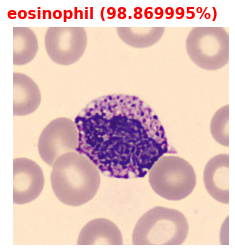

In [141]:
# plotImgAndProb(loaded_model,classes,path_dataset+ df.filename[0])
plotImgAndProb(loaded_model,classes,path_dataset+ df.filename[254])
# dir(loaded_model)
# dir(loaded_model.loss)
# loaded_model.summary() # summary of the model
# loaded_model.loss # loss function
# pd.DataFrame(classes)

In [75]:
img_info = pd.read_csv('img_info.csv')
cell_types = pd.read_csv('cell_types.csv')
cell_types['cell_type3']=cell_types.cell_type_code + ' - ' + cell_types.cell_type2
# cell_types = cell_types[cell_types.Source=='article'].drop(columns=['Source'])
df = pd.merge(img_info,cell_types,how='outer') # merge on column cell_subtype
# display(df.head())

# nombre d'images:
print('nb d\'images:',len(df),'\n')
# distribution des types de cellules:
print(df.cell_type3.value_counts(normalize=True).round(4)*100)

nb d'images: 17094 

NE - neutrophils              19.48
EO - eosinophils              18.23
IG - immature granulocytes    16.94
PL - thrombocytes             13.74
ER - erythroblasts             9.07
MO - monocytes                 8.31
BA - basophils                 7.13
LY - lymphocytes               7.10
Name: cell_type3, dtype: float64


In [80]:
path_dataset +df.filename[0]

'C:/Users/luap_/OneDrive/Data_Science/Projects/bloody_spy_blast/dataset/PBC_dataset_normal_DIB/basophil/BA_100102.jpg'

In [ ]:
test_pred_lenet = lenet.predict(X_test)

test_pred_lenet_class = test_pred_lenet.argmax(axis = 1)
y_test_class = y_test.argmax(axis = 1)

error_indexes = []
for i in range(len(test_pred_cnn)):
    if (test_pred_lenet_class[i] != y_test_class[i]):
        if(test_pred_dense_class[i] != y_test_class[i]):
            if(test_pred_cnn_class[i] != y_test_class[i]):
                error_indexes += [i]

j = 1
for i in np.random.choice(error_indexes, size = 3):
    img = X_test[i] 
    img = img.reshape(28, 28)
    
    plt.subplot(1, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img,cmap = cm.binary, interpolation='None')
    plt.title('True Label: ' + str(y_test_class[i]) \
              + '\n' + 'Prediction: '+ str(test_pred_lenet_class[i]) \
              + '\n' + 'Confidence: '+ str(round(test_pred_lenet[i][test_pred_lenet_class[i]], 2)))
    


In [147]:
help(loaded_model.predict_generator)

Help on method predict_generator in module keras.engine.training:

predict_generator(generator, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0) method of keras.engine.sequential.Sequential instance
    Generates predictions for the input samples from a data generator.
    
    DEPRECATED:
      `Model.predict` now supports generators, so there is no longer any need
      to use this endpoint.



In [22]:
# dir(loaded_model)
# loaded_model.summary()

img_height = loaded_model.input.shape[1]
img_width = loaded_model.input.shape[2]

print(img_height,img_width)

60 60


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

img_height = loaded_model.input.shape[1]
img_width = loaded_model.input.shape[2]

validation_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
                        path_dataset, # same directory as training data
                        target_size=(img_height, img_width),
                        batch_size=32,
                        seed = 123,
                        class_mode = 'categorical')

Y_pred = loaded_model.predict_generator(generator = validation_generator
                  , steps = validation_generator.n//validation_generator.batch_size+1
                  # , callbacks=None
                  # , max_queue_size=10
                  # , workers=1
                  # , use_multiprocessing=False
                  # , verbose=0
                 )

y_pred = np.argmax(Y_pred, axis=1)

Found 17092 images belonging to 8 classes.


C:\Users\luap_\AppData\Local\Temp/ipykernel_20460/225863713.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = loaded_model.predict_generator(generator = validation_generator


In [43]:
print(len(Y_pred) ,len(y_pred),len(validation_generator.classes))

17092 17092 17092


In [ ]:
print(validation_generator.class_indices)
print(validation_generator.class_indices.keys())

In [48]:
from sklearn import metrics

print('Confusion Matrix\n')
print(pd.crosstab(validation_generator.classes, y_pred , rownames = ['Actual'], colnames = ['Predictions']))

print('\nClassification Report\n')
# target_names = ['Cats', 'Dogs', 'Horse']
print(metrics.classification_report(validation_generator.classes, y_pred, target_names=validation_generator.class_indices.keys()))

Confusion Matrix

Predictions   0    1    2    3    4    5    6    7
Actual                                            
0            23  328   56  274   37   61  265  174
1            46  905  162  648   97  155  660  444
2            32  437   83  337   59   55  314  234
3            58  838  150  577  116  135  607  414
4            13  325   65  261   41   64  258  187
5            35  373   69  325   61   60  283  214
6            68  908  178  653  113  170  716  523
7            36  690  104  510   85  115  471  337

Classification Report

              precision    recall  f1-score   support

    basophil       0.07      0.02      0.03      1218
  eosinophil       0.19      0.29      0.23      3117
erythroblast       0.10      0.05      0.07      1551
          ig       0.16      0.20      0.18      2895
  lymphocyte       0.07      0.03      0.04      1214
    monocyte       0.07      0.04      0.05      1420
  neutrophil       0.20      0.22      0.21      3329
    platelet   

In [ ]:
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    if(cnf_matrix[i,j] >15 and i!=j):
        print("Le chiffre {0} a souvent été pris pour le chiffre {1}".format(i,j))

In [ ]:
import pandas as pd
cnf_matrix_df = pd.crosstab(y_test_class, test_pred_class, rownames = ['chiffres réels'], colnames = ['chiffres prédits'])
display(cnf_matrix_df)

In [29]:
validation_generator.classes

array([0, 0, 0, ..., 7, 7, 7])

# Réentrainement du modèle

In [52]:
batch_size = 64
n_epochs = 10
img_height = loaded_model.input.shape[1]
img_width = loaded_model.input.shape[2]

train_datagen = ImageDataGenerator(rescale=1./255,
                                    # shear_range = 0.2, # Shear means that the image will be distorted along an axis
                                    zoom_range = 0.2,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    # horizontal_flip=True,
                                    # vertical_flip=True,
                                    fill_mode='nearest',
                                    validation_split=0.2) # set validation split

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
                        # train_data_dir,
                        path_dataset,
                        target_size=(img_height, img_width),
                        batch_size=batch_size,
                        # class_mode='binary',
                        class_mode = 'categorical',
                        seed=1234, # pour récupérer la consistence de la séparation des données
                        subset='training') # set as training data

test_set = test_datagen.flow_from_directory(
                        # train_data_dir, # same directory as training data
                        path_dataset, # same directory as training data
                        target_size=(img_height, img_width),
                        batch_size=batch_size,
                        # class_mode='binary',
                        class_mode = 'categorical',
                        seed=1234, # pour récupérer la consistence de la séparation des données
                        subset='validation') # set as validation data

# Entrainement
history2 = loaded_model.fit_generator(generator=training_set, 
                                epochs = n_epochs,  # nombre d'itérations
                                steps_per_epoch = training_set.n//training_set.batch_size,
                                   # steps_per_epoch = 100,
                                validation_data=test_set,
                                validation_steps=test_set.n//test_set.batch_size,
                                   # validation_steps = 100,
                                workers = -1 # utiliser tous les coeurs de la machine
                                )

Found 13677 images belonging to 8 classes.
Found 0 images belonging to 8 classes.


C:\Users\luap_\AppData\Local\Temp/ipykernel_20460/913041457.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = loaded_model.fit_generator(generator=training_set,


Epoch 1/10
213/213 [==============================] - 83s 387ms/step - loss: 0.6118 - accuracy: 0.7742
Epoch 2/10
213/213 [==============================] - 77s 364ms/step - loss: 0.5969 - accuracy: 0.7814
Epoch 3/10
213/213 [==============================] - 84s 395ms/step - loss: 0.5749 - accuracy: 0.7831
Epoch 4/10
213/213 [==============================] - 84s 397ms/step - loss: 0.5753 - accuracy: 0.7844
Epoch 5/10
213/213 [==============================] - 84s 395ms/step - loss: 0.5481 - accuracy: 0.8016
Epoch 6/10
213/213 [==============================] - 84s 395ms/step - loss: 0.5339 - accuracy: 0.8035
Epoch 7/10
213/213 [==============================] - 84s 394ms/step - loss: 0.5297 - accuracy: 0.8050
Epoch 8/10
213/213 [==============================] - 84s 395ms/step - loss: 0.5224 - accuracy: 0.8077
Epoch 9/10
213/213 [==============================] - 84s 395ms/step - loss: 0.5220 - accuracy: 0.8080
Epoch 10/10
213/213 [==============================] - 84s 395ms/step - l

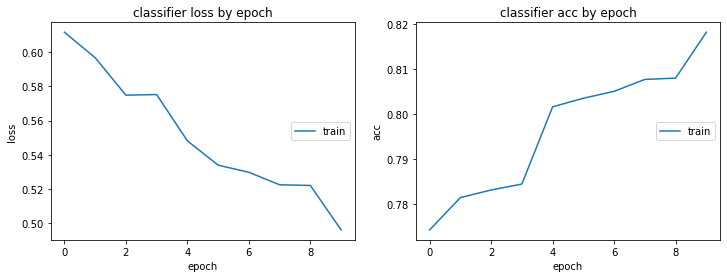

In [56]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history2.history['loss'])
# plt.plot(history2.history['val_loss'])
plt.title('classifier loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.plot(history2.history['accuracy'])
# plt.plot(history2.history['val_accuracy'])
plt.title('classifier acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [59]:
# Ré-évaluation

In [58]:
img_height = loaded_model.input.shape[1]
img_width = loaded_model.input.shape[2]

validation_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
                        path_dataset, # same directory as training data
                        target_size=(img_height, img_width),
                        batch_size=32,
                        seed = 123,
                        class_mode = 'categorical')

Y_pred = loaded_model.predict_generator(generator = validation_generator
                  , steps = validation_generator.n//validation_generator.batch_size+1
                 )

y_pred = np.argmax(Y_pred, axis=1)


print('Confusion Matrix\n')
print(pd.crosstab(validation_generator.classes, y_pred , rownames = ['Actual'], colnames = ['Predictions']))

print('\nClassification Report\n')
# target_names = ['Cats', 'Dogs', 'Horse']
print(metrics.classification_report(validation_generator.classes, y_pred, target_names=validation_generator.class_indices.keys()))

Found 17092 images belonging to 8 classes.


C:\Users\luap_\AppData\Local\Temp/ipykernel_20460/2809213376.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = loaded_model.predict_generator(generator = validation_generator


Confusion Matrix

Predictions    0     1    2    3    4   5    6    7
Actual                                             
0            214   408   44   75   39  12  258  168
1            498  1145  118  151  106  35  646  418
2            244   566   63   74   64  14  296  230
3            434  1054  108  178  120  31  571  399
4            175   423   48   84   50   9  245  180
5            258   502   57   82   54  10  255  202
6            486  1150  133  220  119  32  677  512
7            380   852   82  132   94  32  447  329

Classification Report

              precision    recall  f1-score   support

    basophil       0.08      0.18      0.11      1218
  eosinophil       0.19      0.37      0.25      3117
erythroblast       0.10      0.04      0.06      1551
          ig       0.18      0.06      0.09      2895
  lymphocyte       0.08      0.04      0.05      1214
    monocyte       0.06      0.01      0.01      1420
  neutrophil       0.20      0.20      0.20      3329
    p

In [ ]:
# très mauvaise ==> Améliorer les paramètres
# Reste à faire:
# simuler un filtre sur le background
# simuler un filtre de contours avec un kernel 3x3
# visualiser images en sortie de ce filtre
# freeze des premières couches de preprocessing + entrainement

# Essayer avec un modèle pré entrainé VGG16 